In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle

In [252]:
data=pd.read_csv("F:\\Nikhila AIML\\TefoLOGIC training\\laptop_data.csv")

In [253]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [254]:
data=data.drop(['Unnamed: 0'],axis=1)

In [255]:
data.shape

(1303, 11)

In [256]:
data.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
Company             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price               1303 non-null float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [258]:
data.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [259]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Chuwi          3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

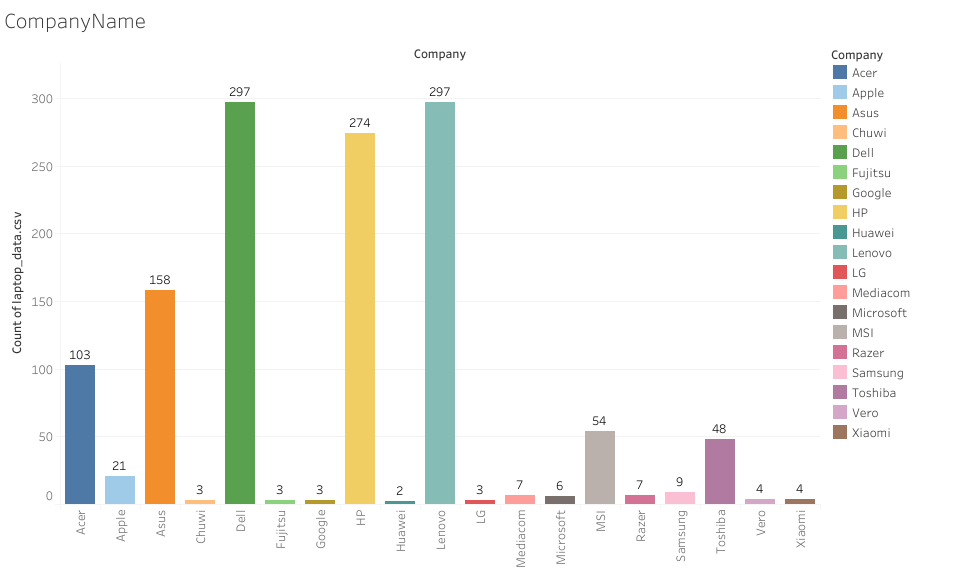

In [261]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [262]:
data['Gpu_new']=data['Gpu'].str.extract(r'(\S{3,}|\S{1,2}\s+\S+)')

In [263]:
data['Gpu_new'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_new, dtype: int64

In [264]:
Gpu_dict={'Intel':0,'Nvidia':1,'AMD':2,'ARM':3}
data['Gpu_new']=data['Gpu_new'].map(Gpu_dict)

In [265]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [266]:
data['Cpu_new']=data['Cpu'].str.extract(r'(\S{3,}|\S{1,2}\s+\S+)')

In [267]:
data['Cpu_new'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Cpu_new, dtype: int64

In [268]:
Cpu_dict={'Intel':0,'AMD':1,'Samsung':2}
data['Cpu_new']=data['Cpu_new'].map(Cpu_dict)

In [269]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Gpu_new,Cpu_new
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,0


In [270]:
df_dell=data.loc[(data['Company']=='Dell')]

In [271]:
df_lenovo=data.loc[(data['Company']=='Lenovo')]

In [272]:
df_hp=data.loc[(data['Company']=='HP')]

In [273]:
df_laptop=pd.concat([df_dell,df_lenovo,df_hp])

In [274]:
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Gpu_new,Cpu_new
13,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,26581.3920,2,0
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,39693.6000,2,0
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22kg,52161.1200,0,0
23,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,43636.3200,0,0
25,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,22305.1392,0,0


In [275]:
df_laptop.shape

(868, 13)

In [276]:
company_dict={'Dell':0,'Lenovo':1,'HP':2}
df_laptop['Company']=df_laptop['Company'].map(company_dict)

In [277]:
df_laptop['OpSys'].unique()

array(['Windows 10', 'Linux', 'Chrome OS', 'Windows 7', 'No OS',
       'Android'], dtype=object)

In [278]:
def os(os_name):
    if os_name == 'Windows 10' or os_name == 'Windows 7':
        return 'Windows'
    else:
        return 'Others/No OS/Linux'
df_laptop['os'] = df_laptop['OpSys'].apply(os)

In [279]:
df_laptop['os'].value_counts()

Windows               763
Others/No OS/Linux    105
Name: os, dtype: int64

In [280]:
os_dict={'Windows':0,'Others/No OS/Linux':1}
df_laptop['os']=df_laptop['os'].map(os_dict)

In [281]:
#replacing GB, Kg with empty string
df_laptop['Ram'] = df_laptop['Ram'].str.replace('GB','')
df_laptop['Ram'] = df_laptop['Ram'].astype('int32')

In [282]:
df_laptop['Weight'] = df_laptop['Weight'].str.replace('kg','')
df_laptop['Weight'] = df_laptop['Weight'].astype('float32')

In [283]:
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Gpu_new,Cpu_new,os
13,0,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,26581.3920,2,0,0
16,0,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.6000,2,0,0
19,0,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.1200,0,0,0
23,0,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.3200,0,0,0
25,0,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,0,0


In [284]:
df_laptop['Memory'].unique()

array(['256GB SSD', '128GB SSD', '1TB HDD', '256GB SSD +  256GB SSD',
       '512GB SSD', '128GB SSD +  1TB HDD', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '128GB SSD +  2TB HDD', '1TB SSD', '500GB HDD',
       '512GB SSD +  256GB SSD', '2TB HDD',
       '64GB Flash Storage +  1TB HDD', '16GB Flash Storage',
       '1TB SSD +  1TB HDD', '64GB Flash Storage', '32GB Flash Storage',
       '180GB SSD', '16GB SSD', '1TB HDD +  1TB HDD',
       '256GB Flash Storage', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid',
       '32GB SSD', '240GB SSD', '8GB SSD', '256GB SSD +  500GB HDD'],
      dtype=object)

In [285]:
df_laptop['Memory_new']=df_laptop['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash\s+\Storage)')

In [286]:
df_laptop['Memory_new'].value_counts()

SSD              559
HDD              272
Flash Storage     27
Hybrid            10
Name: Memory_new, dtype: int64

In [287]:
Memory_dict={'SSD':0,'HDD':1,'Flash Storage':2,'Hybrid':3}
df_laptop['Memory_new']=df_laptop['Memory_new'].map(Memory_dict)

In [288]:
df_laptop['ScreenResolution'].unique()

array(['Full HD 1920x1080', 'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080', '1366x768',
       'Touchscreen / Quad HD+ 3200x1800', 'IPS Panel Full HD 1920x1080',
       'Quad HD+ / Touchscreen 3200x1800',
       '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel 2560x1440',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160', '2560x1440',
       '1600x900', 'Quad HD+ 3200x1800', 'Touchscreen 2560x1440',
       'IPS Panel Touchscreen 1920x1200', 'IPS Panel 1366x768',
       'IPS Panel Full HD 2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Touchscreen 2560x1440', 'IPS Panel Full HD 1366x768',
       'IPS Panel Quad HD+ 3200x1800', '1920x1080',
       'IPS Panel Touchscreen 1366x768'], dtype=object)

In [289]:
df_laptop['Resolution_new']=df_laptop['ScreenResolution'].str.extract(r'(\S{3,}|Full|IPS|Touchscreen)')

In [290]:
df_laptop['Resolution_new'].value_counts()

Full           374
IPS            241
1366x768       178
Touchscreen     21
1600x900        20
Quad            17
Ultra           13
2560x1440        3
1920x1080        1
Name: Resolution_new, dtype: int64

In [291]:
Resolution_dict={'Full':0,'IPS':1,'1366x768':2,'Touchscreen':3,'1600x900':4,'Quad':5,'Ultra':6,'2560x1440':7,'1920x1080':8}
df_laptop['Resolution_new']=df_laptop['Resolution_new'].map(Resolution_dict)

In [292]:
df_laptop['TypeName'].value_counts()

Notebook              527
Ultrabook             116
2 in 1 Convertible     97
Gaming                 84
Workstation            29
Netbook                15
Name: TypeName, dtype: int64

In [293]:
Typename_dict={'Notebook':0,'Ultrabook':1,'2 in 1 Convertible':2,'Gaming':3,'Workstation':4,'Netbook':5}
df_laptop['TypeName']=df_laptop['TypeName'].map(Typename_dict)

In [294]:
df_laptop=df_laptop.drop(['Cpu','Memory','Gpu','OpSys','ScreenResolution'],axis=1)

In [295]:
df_laptop.head()

,Company,TypeName,Inches,Ram,Weight,Price,Gpu_new,Cpu_new,os,Memory_new,Resolution_new
13,0,0,15.6,4,2.20,26581.3920,2,0,0,0,0
16,0,0,15.6,8,2.20,39693.6000,2,0,0,0,0
19,0,1,13.3,8,1.22,52161.1200,0,0,0,0,1
23,0,2,13.3,8,1.62,43636.3200,0,0,0,0,0
25,0,0,15.6,4,2.30,22305.1392,0,0,0,1,2


In [296]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df_laptop['Company']=le.fit_transform(df_laptop['Company'])
#df_laptop['TypeName']=le.fit_transform(df_laptop['TypeName'])
#df_laptop['Gpu_new']=le.fit_transform(df_laptop['Gpu_new'])
#df_laptop['Memory_new']=le.fit_transform(df_laptop['Memory_new'])
#df_laptop['Resolution_new']=le.fit_transform(df_laptop['Resolution_new'])
#df_laptop['Cpu_new']=le.fit_transform(df_laptop['Cpu_new'])
#df_laptop['os']=le.fit_transform(df_laptop['os'])

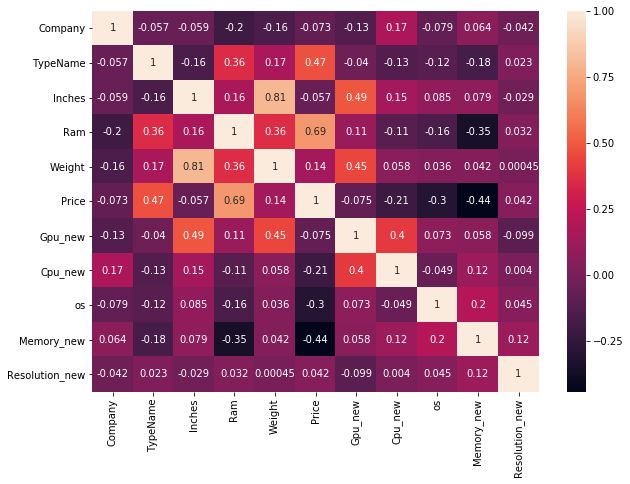

In [299]:
plt.figure(figsize=(10,7))
sns.heatmap(df_laptop.corr(),annot=True)

In [300]:
x=df_laptop.drop(['Price'],axis=1)
y=df_laptop['Price']

In [301]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35,random_state=45)

In [302]:
xtrain.shape

(564, 10)

In [303]:
ytrain.shape

(564,)

In [304]:
xtest.shape

(304, 10)

In [340]:
x.head()

,Company,TypeName,Inches,Ram,Weight,Gpu_new,Cpu_new,os,Memory_new,Resolution_new
13,0,0,15.6,4,2.20,2,0,0,0,0
16,0,0,15.6,8,2.20,2,0,0,0,0
19,0,1,13.3,8,1.22,0,0,0,0,1
23,0,2,13.3,8,1.62,0,0,0,0,0
25,0,0,15.6,4,2.30,0,0,0,1,2


In [305]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [306]:
y_pred=reg.predict(xtest)

In [307]:
y_pred

array([ 61445.70174777,  92914.55696335,  85287.67125815,  49255.39427018,
        66440.87606882,  49678.95732703,  69730.42641574, 102955.37650444,
       157575.72299121,  33869.07202536,  79369.68602571,  48918.57144721,
        37794.25509711,  29078.13111322,  17643.48498027,  43912.42673159,
        64128.76461237,  55255.78067842,  37529.59459304, 173207.42205012,
       106178.13517566,  63968.98795342,  50576.09313019,  69385.52692101,
        63620.23077553,  41788.27926965,  63620.23077553,  52290.2418059 ,
        30580.78282985,  62447.03600603,  45594.8717025 ,  77030.60000149,
        71897.99765696,  65894.85826582,  30838.97936987,  78284.36107916,
        50634.42734279,  92850.57587426,  18924.98427042,  82420.64899342,
        37288.30779194,  53830.58117988, 115014.41959474,  15891.97490604,
        17074.30598957,  57962.96516818,   9282.43951086,  58386.16009926,
        66265.62198799,  70054.18145042,  37590.8455493 ,  50170.22965488,
        25127.0325222 ,  

In [308]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.6548188511062898

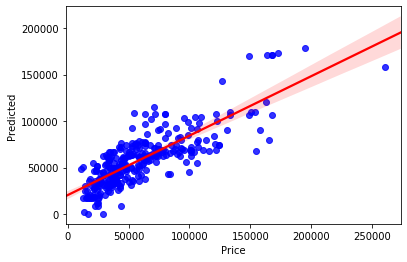

In [309]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(ytest, y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [310]:
from sklearn.metrics import mean_squared_error #calculating MSE
mse=mean_squared_error(y_pred,ytest)
mse

493726103.7774658

In [311]:
from math import sqrt
rms=sqrt(mse)
rms

22219.948329765888

In [312]:
Results= pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=ytest
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(5)

,index,Price,Predicted,Id
0,773,58554.7200,61445.701748,0
1,945,53226.7200,92914.556963,1
2,469,98994.2400,85287.671258,2
3,1016,41025.0672,49255.394270,3
4,275,37992.3696,66440.876069,4


In [313]:
Results['SUB']=Results['Price']-Results['Predicted']
Results.head()

,index,Price,Predicted,Id,SUB
0,773,58554.7200,61445.701748,0,-2890.981748
1,945,53226.7200,92914.556963,1,-39687.836963
2,469,98994.2400,85287.671258,2,13706.568742
3,1016,41025.0672,49255.394270,3,-8230.327070
4,275,37992.3696,66440.876069,4,-28448.506469


[]

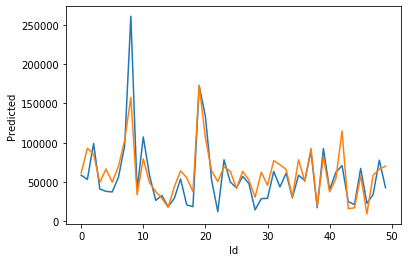

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

[]

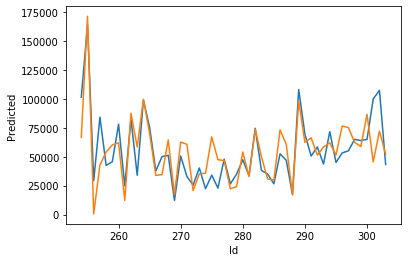

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()

# Ridge Regression

In [316]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV


from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(xtrain, ytrain)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [317]:
ridge_regressor.best_params_

{'alpha': 5}

In [318]:
ridge=Ridge(alpha=5)
ridge.fit(xtrain,ytrain)
y_pred_ridge=ridge.predict(xtest)

In [319]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred_ridge)


0.654729757576676

In [320]:
from sklearn.metrics import mean_squared_error #calculating MSE
mean_squared_error(y_pred_ridge,ytest)

493853537.73899287

In [321]:
Results= pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=ytest
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(5)

,index,Price,Predicted,Id
0,773,58554.7200,61275.493147,0
1,945,53226.7200,95560.097028,1
2,469,98994.2400,85334.843723,2
3,1016,41025.0672,48696.434155,3
4,275,37992.3696,66675.962169,4


[]

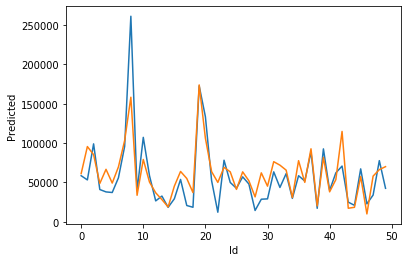

In [322]:
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

# ElasticNet Regression

In [323]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(xtrain, ytrain)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [324]:
elastic_regressor.best_params_

{'alpha': 0.01}

In [325]:
elastic=ElasticNet(alpha=.01)
elastic.fit(xtrain,ytrain)
y_pred_elastic=elastic.predict(xtest)

In [326]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred_elastic)

0.6548213827947694

In [327]:
Results= pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=ytest
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(5)

,index,Price,Predicted,Id
0,773,58554.7200,61340.910705,0
1,945,53226.7200,94568.912985,1
2,469,98994.2400,85320.585142,2
3,1016,41025.0672,48925.305067,3
4,275,37992.3696,66584.302192,4


[]

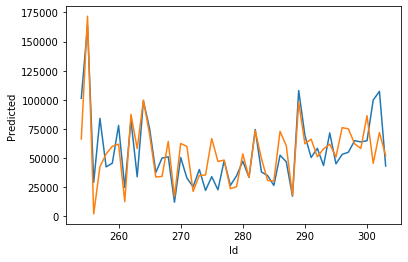

In [328]:
sns.lineplot(x='Id',y='Price',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()

[]

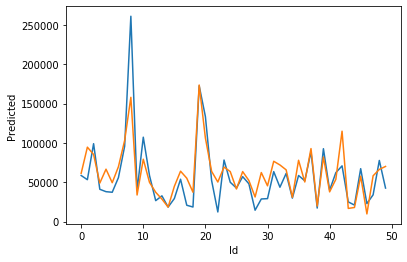

In [329]:
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

# Random forest regressor

In [330]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['mse'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [331]:
RFC_reg.best_params_

{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 75}

In [332]:
reg=RandomForestRegressor(n_estimators=75,criterion='mse',max_depth=10)

In [333]:
reg.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10, n_estimators=75)

In [334]:
y_pred_rfr=reg.predict(xtest)

In [335]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred_rfr)

0.7451474415034064

In [336]:
Results= pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=ytest
Results['Predicted']=y_pred_rfr
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(5)

,index,Price,Predicted,Id
0,773,58554.7200,54116.621369,0
1,945,53226.7200,62329.736506,1
2,469,98994.2400,93475.902604,2
3,1016,41025.0672,38914.992686,3
4,275,37992.3696,32945.203660,4


[]

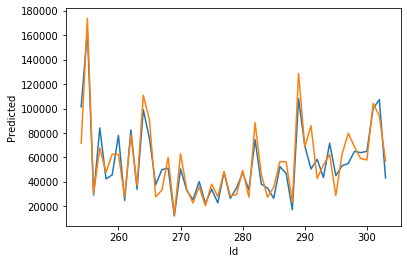

In [337]:
sns.lineplot(x='Id',y='Price',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()

 test size  0.25  0.30   0.35 
Linear      0.69  0.66   0.65
ridge       0.69  0.66   0.65
elastic     0.69  0.66   0.65
random      0.74  0.76   0.75
forest

In [338]:
filename='laptop_price_model'
pickle.dump(reg,open(filename,'wb'))